In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score,f1_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import os
os.chdir('G:/credit_card_data/archive (2)')

In [111]:
data=pd.read_csv('BankChurners.csv')
data_selected_X=data.iloc[:,[3,5,6,7,8,2,4,9,10,11,12,18,13,14,15,16,17]]
data_selected_Y=data.iloc[:,1]
data_selected_X.isna().sum()
data_selected_X.head(10)

,Gender,Education_Level,Marital_Status,Income_Category,Card_Category,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Total_Trans_Ct,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt
0,M,High School,Married,$60K - $80K,Blue,45,3,39,5,1,3,42,12691.0,777,11914.0,1.335,1144
1,F,Graduate,Single,Less than $40K,Blue,49,5,44,6,1,2,33,8256.0,864,7392.0,1.541,1291
2,M,Graduate,Married,$80K - $120K,Blue,51,3,36,4,1,0,20,3418.0,0,3418.0,2.594,1887
3,F,High School,Unknown,Less than $40K,Blue,40,4,34,3,4,1,20,3313.0,2517,796.0,1.405,1171
4,M,Uneducated,Married,$60K - $80K,Blue,40,3,21,5,1,0,28,4716.0,0,4716.0,2.175,816
5,M,Graduate,Married,$40K - $60K,Blue,44,2,36,3,1,2,24,4010.0,1247,2763.0,1.376,1088
6,M,Unknown,Married,$120K +,Gold,51,4,46,6,1,3,31,34516.0,2264,32252.0,1.975,1330
7,M,High School,Unknown,$60K - $80K,Silver,32,0,27,2,2,2,36,29081.0,1396,27685.0,2.204,1538
8,M,Uneducated,Single,$60K - $80K,Blue,37,3,36,5,2,0,24,22352.0,2517,19835.0,3.355,1350
9,M,Graduate,Single,$80K - $120K,Blue,48,2,36,6,3,3,32,11656.0,1677,9979.0,1.524,1441


In [108]:
index_int=[5,6,7,8,9,10,11]
index_float=[12,13,14,15,16]
index_string=[0,1,2,3,4]
CT=ColumnTransformer(transformers=[('onehot',OneHotEncoder(),index_string),('minmax',MinMaxScaler(),index_int),('standardscaler',StandardScaler(),index_float)])
Xt=np.array(CT.fit_transform(data_selected_X))
Xt.shape
OE=OrdinalEncoder()
Yt=OE.fit_transform(np.asarray(data_selected_Y).reshape((-1,1)))
cls=data_selected_X.columns
col_names=[]

i=0
for i in cls:
    ds=data_selected_X[i].values
    if type(ds[0])==str:
        c1=len(data_selected_X[i].unique())
        for j in range(c1):
            col_n=i+'_'+str(j+1)
            col_names.append(col_n)
    else:
        col_names.append(i)
        
print(Xt[0,0])
col_names
Xt[1,:]

0.0


array([ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  0.4893617 ,  1.        ,
        0.72093023,  1.        ,  0.16666667,  0.33333333,  0.17829457,
       -0.04136665, -0.36666682, -0.00848599,  3.56329284, -0.91643261])

([<matplotlib.axis.YTick at 0x1d285bfdeb0>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

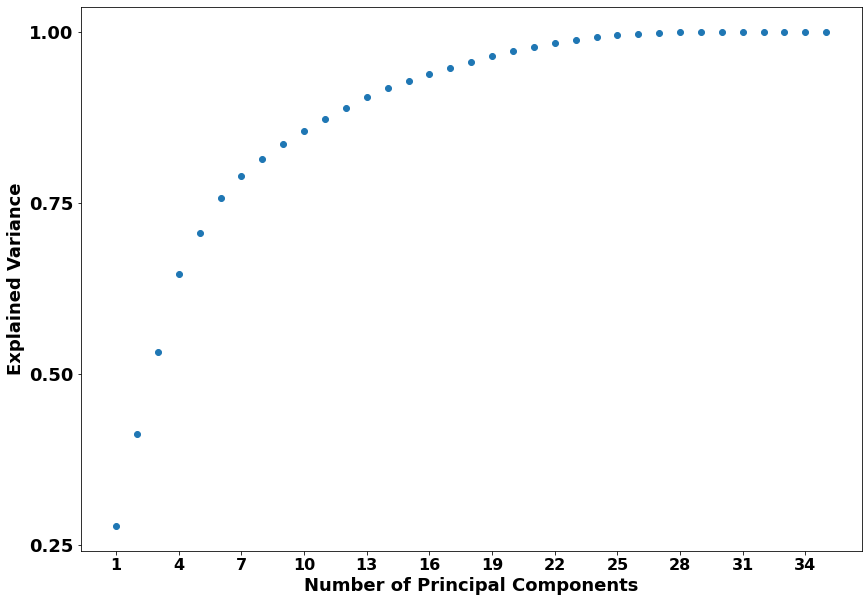

In [79]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
plt.figure(figsize=(14,10))
pca = PCA()

principalComponents = pca.fit_transform(Xt)
PCA_VARS=pca.explained_variance_ratio_
x=np.asarray(range(1,len(PCA_VARS)+1))

plt.scatter(x,np.cumsum(PCA_VARS))
plt.xticks(np.asarray(range(1,len(PCA_VARS)+1,3)),fontsize=16,fontweight='bold')
plt.ylabel('Explained Variance',fontsize=18,fontweight='bold')
plt.xlabel('Number of Principal Components',fontsize=18,fontweight='bold')
plt.yticks([0.25,0.5,0.75,1.0],fontsize=18,fontweight='bold')
#plt.plot(np.range(PCA_VARS),PCA_VARS)

In [80]:
pca7 = PCA(n_components=7)
principalComponents_7=pca7.fit_transform(Xt)
PCA_VARS7=pca7.explained_variance_ratio_
scores_7=pca7.transform(Xt)
print('Explained variance with 7 principal components:',100*np.sum(PCA_VARS7),'%')
#print('Explained variance with two principal components:',100*np.sum(PCA_VARS),'%')
loadings = pd.DataFrame(pca7.components_.T, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7'], index=col_names)


Explained variance with 7 principal components: 78.86004471652022 %


Text(0.5, 0, 'Number of Clusters')

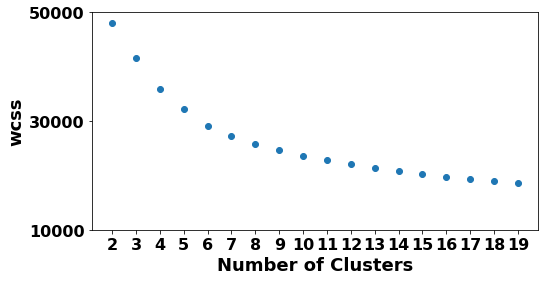

In [83]:
wcss=[]

for i in range(2,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(principalComponents_7)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(8,4))
plt.scatter(range(2,20),wcss)
plt.yticks([10000,30000,50000],fontsize=16,fontweight='bold')
plt.xticks(range(2,20),fontsize=16,fontweight='bold')
plt.ylabel('wcss',fontsize=18,fontweight='bold')
plt.xlabel('Number of Clusters',fontsize=18,fontweight='bold')

In [84]:
clrs={0:'blue',1:'red',2:'black',3:'green',4:'yellow',5:'pink',6:'purple',7:'grey',8:'magenta',9:'yellowgreen',10:'cyan'}
kmeans_best=KMeans(n_clusters=7,init='k-means++',random_state=42)
kmeans_best.fit(Xt)
labels=kmeans_best.labels_
clrs1=[]
for i in labels:
    clrs1.append(clrs[i])
    

In [63]:
clrs1

['purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'black',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'purple',
 'green',
 'purple',
 'green',
 'green',
 'yellow',
 'purple',
 'red',
 'green',
 'red',
 'green',
 'black',
 'yellow',
 'black',
 'black',
 'purple',
 'purple',
 'purple',
 'black',
 'red',
 'purple',
 'yellow',
 'purple',
 'purple',
 'blue',
 'black',
 'purple',
 'purple',
 'red',
 'blue',
 'purple',
 'purple',
 'green',
 'black',
 'purple',
 'yellow',
 'purple',
 'green',
 'green',
 'red',
 'red',
 'purple',
 'purple',
 'black',
 'black',
 'blue',
 'black',
 'green',
 'green',
 'blue',
 'black',
 'red',
 'purple',
 'green',
 'blue',
 'red',
 'black',
 'green',
 'purple',
 'black',
 'red',
 'red',
 'black',
 'blue',
 'purple',
 'blue',
 'yellow',
 'red',
 'blue',
 'black',
 'green',
 'yellow',
 'purple',
 'purple',
 'yellow',
 'blue',
 'yellow',
 'black',
 'purple',
 'purple',
 'black',
 'purple',
 'b

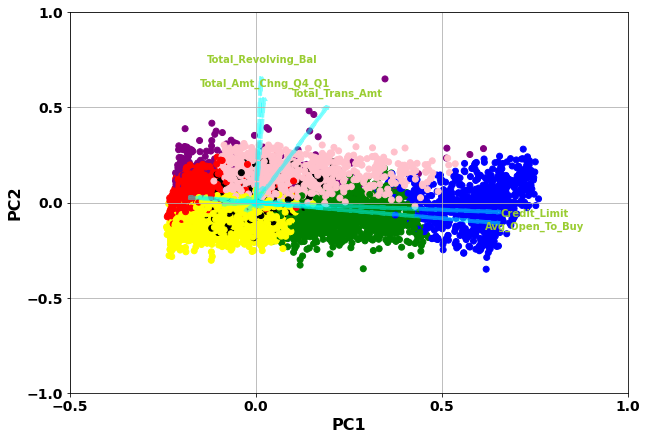

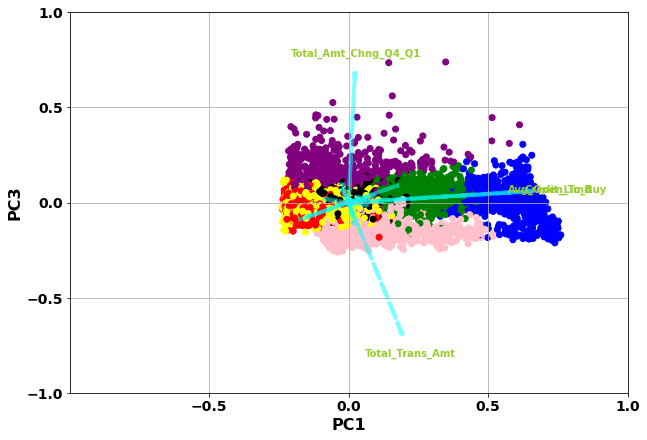

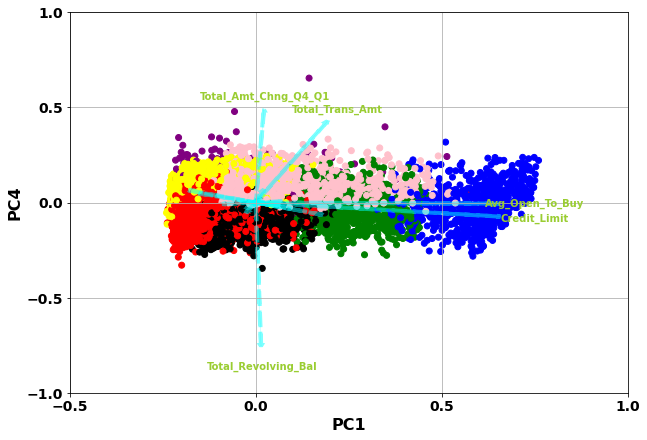

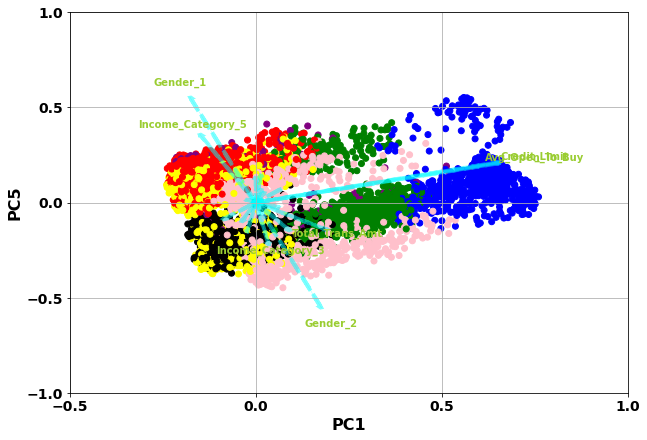

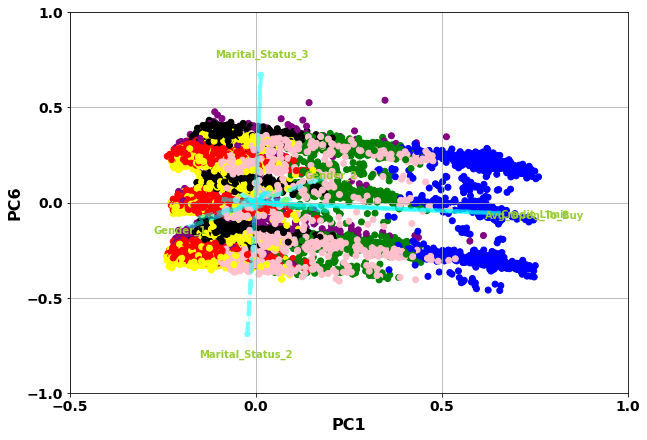

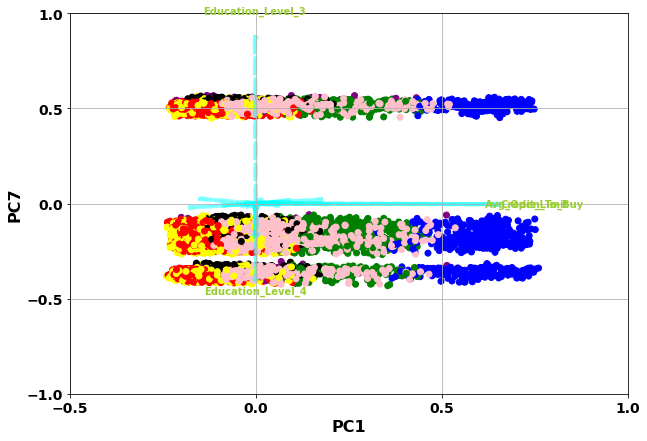

In [110]:
from numpy.linalg import norm
def myplot(score,coeff,pcs,xlim,ylim,colors,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c =colors )
    for i in range(n):
        l1=norm(np.array([coeff[i,0], coeff[i,1]]))
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'cyan',linestyle='--',linewidth=4,alpha = 0.5)
        if l1>0.2:
            if labels is None:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'yellowgreen', ha = 'center', va = 'center',fontweight='bold')
            else:
                plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'yellowgreen', ha = 'center', va = 'center',fontweight='bold')
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel("PC{}".format(pcs[0]),fontweight='bold',fontsize=16)
    plt.ylabel("PC{}".format(pcs[1]),fontweight='bold',fontsize=16)
    plt.xticks([-0.5,0,0.5,1],fontweight='bold',fontsize=14)
    plt.yticks([-1,-0.5,0,0.5,1],fontweight='bold',fontsize=14)

    plt.grid()
#pca6_addedColors=principalComponents_6['color']
#Call the function. Use only the 2 PCs.
plt.figure(figsize=(10,7))
myplot(principalComponents_7[:,0:2],loadings.iloc[:,0:2].values,[1,2],[-0.5,1],[-0.5,1],clrs1,labels=col_names)
plt.show()

plt.figure(figsize=(10,7))
myplot(principalComponents_7[:,[0,2]],loadings.iloc[:,[0,2]].values,[1,3],[-1,1],[-1,1],clrs1,labels=col_names)
plt.show()

plt.figure(figsize=(10,7))
myplot(principalComponents_7[:,[0,3]],loadings.iloc[:,[0,3]].values,[1,4],[-.5,1],[-1,1],clrs1,labels=col_names)
plt.show()
plt.figure(figsize=(10,7))
myplot(principalComponents_7[:,[0,4]],loadings.iloc[:,[0,4]].values,[1,5],[-.5,1],[-1,1],clrs1,labels=col_names)
plt.show()
plt.figure(figsize=(10,7))
myplot(principalComponents_7[:,[0,5]],loadings.iloc[:,[0,5]].values,[1,6],[-.5,1],[-1,1],clrs1,labels=col_names)
plt.show()
plt.figure(figsize=(10,7))
myplot(principalComponents_7[:,[0,6]],loadings.iloc[:,[0,6]].values,[1,7],[-.5,1],[-1,1],clrs1,labels=col_names)
plt.show()

In [128]:
Xtrain,Xtest,y_train,y_test=train_test_split(Xt,Yt,random_state=42,test_size=0.2)

n_estimators = [50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(40, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points
LR=RandomForestClassifier()
random_grid = {'n_estimators': n_estimators,'max_features': max_features,'max_depth': max_depth,'min_samples_split': min_samples_split,'min_samples_leaf': min_samples_leaf,'bootstrap': bootstrap}
rf_random = RandomizedSearchCV(estimator = LR,param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=0, n_jobs = -1)
rf_random.fit(Xtrain,y_train.reshape((-1,)))
rf_random.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomForestClassifier(bootstrap=False, max_depth=69, max_features='sqrt',
                       min_samples_split=6)

In [71]:
LR=RandomForestClassifier(bootstrap=False, max_depth=69, max_features='sqrt',min_samples_split=6)
LR.fit(Xtrain,y_train.reshape((-1,)))
y_p=LR.predict(Xtest)
print('f1 score is',f1_score(y_test,y_p,average='weighted'))
print('accuracy score is',accuracy_score(y_test,y_p))

f1 score is 0.9509982950398224
accuracy score is 0.9526159921026653
